# Context 

>Scraped from CNBC, the Guardian, and Reuters official websites, the headlines in these datasets reflects the overview of the U.S. economy and stock market every day for the past year to 2 years.

# Content

> Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
Data scraped from the Guardian Business contains the headlines and last updated date of articles from the end of December 2017 to July 19th, 2020 since the Guardian Business does not offer preview text.
Data scraped from Reuters contains the headlines, last updated date, and the preview text of articles from the end of March 2018 to July 19th, 2020.

# Inspiration

> I firmly believe that the sentiment of financial news articles reflects and directs the performance of the U.S. stock market. Therefore, by applying Natural Language Processing (NLP) through these headlines, I can see how the positivity/negativity of the score through each day correlate to the stock market's gains/losses.

The cover image was taken from https://hipwallpaper.com/stock-trader-wallpapers/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set(style='darkgrid')

In [3]:
cnbc_df = pd.read_csv('cnbc_headlines.csv')

In [4]:
guardian_df = pd.read_csv('guardian_headlines.csv')

In [5]:
reuters_df = pd.read_csv('reuters_headlines.csv')

In [6]:
cnbc_df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [7]:
cnbc_df.shape

(3080, 3)

In [8]:
cnbc_df.isna().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [9]:
cnbc_df.dropna(inplace=True)

In [10]:
cnbc_df.reset_index(inplace=True, drop=True)

In [11]:
guardian_df.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [12]:
guardian_df.shape

(17800, 2)

In [13]:
guardian_df.isna().sum()

Time         0
Headlines    0
dtype: int64

In [14]:
reuters_df.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [15]:
reuters_df.isna().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [16]:
reuters_df.shape

(32770, 3)

# Concat Three Dataframes

In [17]:
df = pd.concat([cnbc_df, reuters_df], axis=0, ignore_index=True)

# TextBlob

> Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [18]:
# pip install -U textblob 

In [19]:
from textblob import TextBlob

In [20]:
text = df['Description'][0]

In [21]:
df.loc[3,'Description']

'Keith Bliss, IQ Capital CEO, joins "Closing Bell" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq.'

In [22]:
df[df.duplicated() == True].shape

(55, 3)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
text[0] 

'"'

In [25]:
TextBlob(text).sentiment

Sentiment(polarity=-0.1875, subjectivity=0.625)

# Sentiment Function for Labaling

In [26]:
def sentiment_analysis(text_df, description_column):
    #Create a function to get the subjectivity
    def get_subjectivity(text):
        return TextBlob(text).sentiment.subjectivity
    
    #Create a function to get the polarity
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity
    
    
    #Create two new columns ‘Subjectivity’ & ‘Polarity’
    text_df['subjectivity'] = text_df[description_column].apply(get_subjectivity)
    text_df['polarity'] = text_df[description_column].apply(get_polarity)
    
    
    def get_analysis(score):
        
        if score > 0:
            return 'Positive'
        
        elif score == 0:
            return 'Neutral'
        
        else:
            return 'Negative'
        
        
    text_df['sentiment_label'] = text_df['polarity'].apply(get_analysis)
        
    return text_df    

In [27]:
sentiment_analysis(df, 'Description')

,Headlines,Time,Description,subjectivity,polarity,sentiment_label
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",0.625000,-0.187500,Negative
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",0.700000,-0.412500,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",0.550000,0.600000,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.000000,0.000000,Neutral
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",0.750000,-0.187500,Negative
...,...,...,...,...,...,...
35565,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,0.233333,-0.066667,Negative
35566,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,0.280303,0.117424,Positive
35567,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,0.333333,0.250000,Positive
35568,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,0.255556,0.025000,Positive


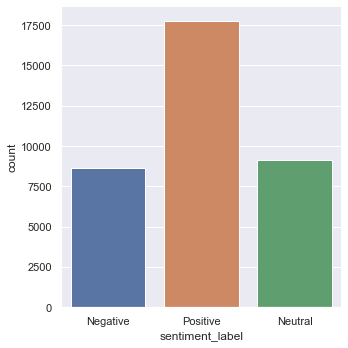

In [28]:
sns.catplot(data=df, x='sentiment_label',kind='count');

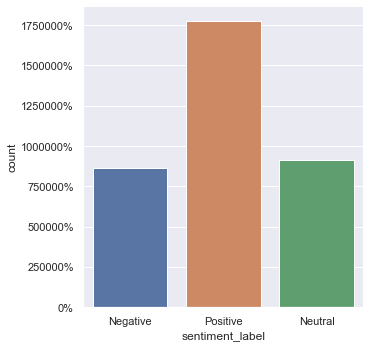

In [29]:
from  matplotlib.ticker import PercentFormatter

g = sns.catplot(
    data=df,
    x='sentiment_label',
    kind="count")

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

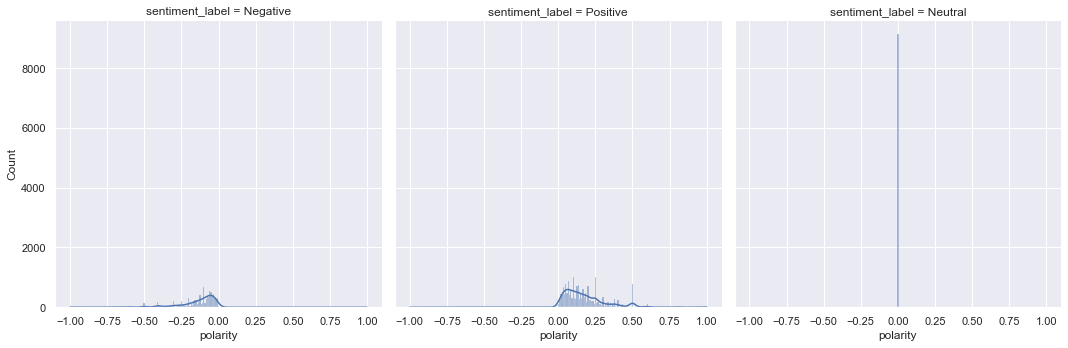

In [30]:
sns.displot(data=df, x='polarity', kde=True, col='sentiment_label');

# Data Preprocessing

In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

#import stopwords and text processing libraries

from nltk.corpus import stopwords


In [32]:
sent = sent_tokenize(df['Description'][0])

In [33]:
[word_tokenize(word) for word in cnbc_df['Description']][0]

['``',
 'Mad',
 'Money',
 "''",
 'host',
 'Jim',
 'Cramer',
 'recommended',
 'buying',
 'four',
 'companies',
 'that',
 'are',
 'supporting',
 'vaccine',
 'developers',
 '.']

In [34]:
stopwords = stopwords.words('english')

In [35]:
def preprocessing(text):
    
    #convert all to lowercase
    text = text.lower()
    
    #removing puntuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #remove stopwords
    word_token = [word for word in word_tokenize(text) if word.isalpha() and word not in stopwords]
    
    #lemmitizing
    wnl = WordNetLemmatizer()
    lema_word = [wnl.lemmatize(word) for word in word_token]
    
    return ' '.join(lema_word)
    

In [36]:
df['Description'] = df['Description'].apply(preprocessing)

In [37]:
df.head()

,Headlines,Time,Description,subjectivity,polarity,sentiment_label
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.625,-0.1875,Negative
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,0.700,-0.4125,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings non covid company lancet publishe...,0.550,0.6000,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,0.000,0.0000,Neutral
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high quality company going lower ev...,0.750,-0.1875,Negative


In [38]:
df.sentiment_label.value_counts().index

Index(['Positive', 'Neutral', 'Negative'], dtype='object')

In [39]:
df.sentiment_label.value_counts() / len(df) * 100

Positive    49.995776
Neutral     25.690553
Negative    24.313670
Name: sentiment_label, dtype: float64

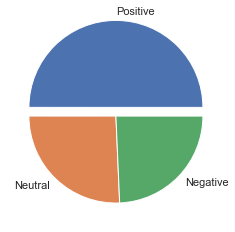

In [40]:
# colors = sns.color_palette('pastel')[0:5]
labels = df.sentiment_label.value_counts().index
data = df.sentiment_label.value_counts().values

plt.pie(data, labels = labels, explode=[0.1,0,0]);

# Machine Learning

In [41]:
# 1. CountVectorizer
# 2. TfidTransformer

In [49]:
# split the dataset  into test and train 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC


In [50]:
X = df['Description']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [44]:
# tfidf = TfidfVectorizer()
# X_train_new = tfidf.fit_transform(X_train).toarray()
# X_test_new = tfidf.transform(X_test).toarray()

In [ ]:
# svc = SVC()
# svc.fit(X_train_new, y_train)
# y_pred = svc.predict(X_test_new)

In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# svc.score(X_train_new, y_train)

In [ ]:
# svc.score(X_test_new, y_test)

In [46]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [47]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [51]:
y_pred = pipeline.predict(X_test)

In [55]:
pipeline.score(X_train, y_train)

0.9809939462199071

In [56]:
pipeline.score(X_test, y_test)

0.7578487962832606

In [54]:
print('Model: SVC')
print('accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model: SVC
accuracy score: 0.7578487962832606
Confusion Matrix: [[ 923  328  476]
 [  54 1405  366]
 [ 182  314 3055]]
              precision    recall  f1-score   support

    Negative       0.80      0.53      0.64      1727
     Neutral       0.69      0.77      0.73      1825
    Positive       0.78      0.86      0.82      3551

    accuracy                           0.76      7103
   macro avg       0.76      0.72      0.73      7103
weighted avg       0.76      0.76      0.75      7103

